# Soccer Mini Project

Mini project of UCSanDiegoX's Python for Data Science.
In this notebook, the process of data cleaning and data exploration will be carried out to draw conclusions.

The dataset used is the European Soccer Database from Kaggle: 
https://www.kaggle.com/hugomathien/soccer

In [722]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

In [723]:
# create SQL connection to SQLite database

con = sqlite3.connect("soccer.sqlite", detect_types=True)

cur  = con.cursor()

Tables:

Country
League 
Match 
Player 
Player_Attributes 
Team 
Team_Attributes 


In [724]:
# ingest Player table

player_query = pd.read_sql_query("SELECT * FROM Player", con)
player = pd.DataFrame(player_query)
player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [725]:
#ingest Player_Attributes table

player_att_query = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
player_att = pd.DataFrame(player_att_query)
player_att

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [726]:
# merge Player and Player_Attribute tables

players = pd.merge(player, player_att, on="player_api_id")
players.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Is there a relationship between penalty rating and dominant foot of players?

In [727]:
#preferred foot correlation with penalties
df = players[['preferred_foot', 'penalties']]
mean_penalty_rating = df.groupby(['preferred_foot']).mean()
mean_penalty_rating

,penalties
preferred_foot,
left,55.465786
right,54.854735


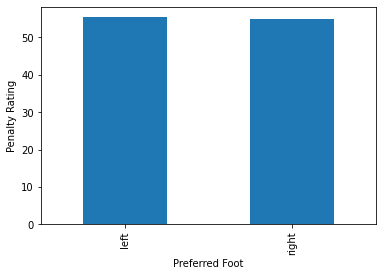

In [728]:
ax1 = mean_penalty_rating.plot(kind='bar', legend=False)
ax1.set_xlabel('Preferred Foot')
ax1.set_ylabel('Penalty Rating')
plt.show()

In [729]:
dom_foot_count = df.groupby(['preferred_foot']).count()
dom_foot_count

,penalties
preferred_foot,
left,44733
right,138409


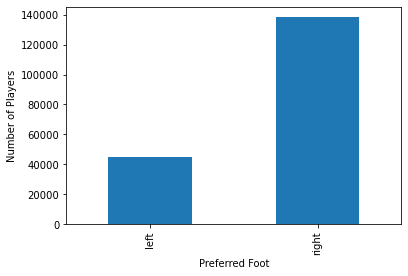

In [730]:
ax2 = dom_foot_count.plot(kind='bar', legend=False)
ax2.set_xlabel('Preferred Foot')
ax2.set_ylabel('Number of Players')
plt.show()

Although the mean penalty rating is higher for left-footers is slightly higher than right footers. However, there is more than 3 times the number of right-footers than left footers. The disparity in sample size is too large and the difference in mean penalty rating is too small to conclude any correlation between penalty rating and dominant foot.

## Do teams win more at home or away?


In [731]:
# ingest Match table

match_query = pd.read_sql_query("SELECT * FROM Match", con)
match = pd.DataFrame(match_query)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [732]:
col = list(match.columns)
col

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [733]:
#ingest team table
team_query = pd.read_sql_query("SELECT * FROM team", con)
team = pd.DataFrame(team_query)
team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [734]:
# create dataframe with goal data
match_goals = match[['home_team_api_id', 'away_team_api_id','home_team_goal', 'away_team_goal']]
match_goals

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,9987,9993,1,1
1,10000,9994,0,0
2,9984,8635,0,3
3,9991,9998,5,0
4,7947,9985,1,3
...,...,...,...,...
25974,10190,10191,1,0
25975,9824,10199,1,2
25976,9956,10179,2,0
25977,7896,10243,0,0


In [735]:
#remove null values
match_goals.dropna(axis=0)

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,9987,9993,1,1
1,10000,9994,0,0
2,9984,8635,0,3
3,9991,9998,5,0
4,7947,9985,1,3
...,...,...,...,...
25974,10190,10191,1,0
25975,9824,10199,1,2
25976,9956,10179,2,0
25977,7896,10243,0,0


In [736]:
# get dictionary of team_id and team name, to insert team name into match_goals table
team_dict = dict(zip(team['team_api_id'], team['team_short_name']))
team_dict

{9987: 'GEN',
 9993: 'BAC',
 10000: 'ZUL',
 9994: 'LOK',
 9984: 'CEB',
 8635: 'AND',
 9991: 'GEN',
 9998: 'MON',
 7947: 'DEN',
 9985: 'STL',
 8203: 'MEC',
 8342: 'CLB',
 9999: 'ROS',
 8571: 'KOR',
 4049: 'TUB',
 9996: 'MOU',
 10001: 'WES',
 9986: 'CHA',
 9997: 'STT',
 9989: 'LIE',
 6351: 'EUP',
 1773: 'O-H',
 8475: 'WAA',
 8573: 'OOS',
 274581: 'MOP',
 10260: 'MUN',
 10261: 'NEW',
 9825: 'ARS',
 8659: 'WBA',
 8472: 'SUN',
 8650: 'LIV',
 8654: 'WHU',
 8528: 'WIG',
 10252: 'AVL',
 8456: 'MCI',
 8668: 'EVE',
 8655: 'BLB',
 8549: 'MID',
 8586: 'TOT',
 8559: 'BOL',
 10194: 'STK',
 8667: 'HUL',
 9879: 'FUL',
 8455: 'CHE',
 8462: 'POR',
 8658: 'BIR',
 8602: 'WOL',
 8191: 'BUR',
 8483: 'BLA',
 10003: 'SWA',
 10172: 'QPR',
 9850: 'NOR',
 8466: 'SOU',
 9798: 'REA',
 9826: 'CRY',
 8344: 'CAR',
 8197: 'LEI',
 8678: 'BOU',
 9817: 'WAT',
 8583: 'AUX',
 9830: 'NAN',
 9827: 'BOR',
 7819: 'CAE',
 9746: 'LEH',
 9831: 'NIC',
 8682: 'LEM',
 8689: 'LOR',
 9748: 'LYO',
 9941: 'TOU',
 9829: 'MON',
 9847: 'PS

In [737]:
# add team names to match_goals
home = []
away = []
for index, row in match_goals.iterrows():
    home.append(team_dict[row['home_team_api_id']])
    away.append(team_dict[row['away_team_api_id']])

match_goals.insert(0, 'home_team_name', home)
match_goals.insert(1, 'away_team_name', away)
match_goals

,home_team_name,away_team_name,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,GEN,BAC,9987,9993,1,1
1,ZUL,LOK,10000,9994,0,0
2,CEB,AND,9984,8635,0,3
3,GEN,MON,9991,9998,5,0
4,DEN,STL,7947,9985,1,3
...,...,...,...,...,...,...
25974,GAL,THU,10190,10191,1,0
25975,VAD,LUZ,9824,10199,1,2
25976,GRA,SIO,9956,10179,2,0
25977,LUG,ZUR,7896,10243,0,0


In [738]:
# find winner of the match, then add winner column to match_goals
winner = []
winning_team = []
for index, row in match_goals.iterrows():
    if row['home_team_goal'] > row['away_team_goal']:
        winner.append('HOME')
        winning_team.append(row['home_team_name'])
    elif row['home_team_goal'] < row['away_team_goal']:
        winner.append('AWAY')
        winning_team.append(row['away_team_name'])
    else:
        winner.append('DRAW')
        winning_team.append('Draw')

match_goals.insert(len(match_goals.columns), 'winner', winner)
match_goals.insert(len(match_goals.columns), 'winning team', winning_team)
match_goals

,home_team_name,away_team_name,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner,winning team
0,GEN,BAC,9987,9993,1,1,DRAW,Draw
1,ZUL,LOK,10000,9994,0,0,DRAW,Draw
2,CEB,AND,9984,8635,0,3,AWAY,AND
3,GEN,MON,9991,9998,5,0,HOME,GEN
4,DEN,STL,7947,9985,1,3,AWAY,STL
...,...,...,...,...,...,...,...,...
25974,GAL,THU,10190,10191,1,0,HOME,GAL
25975,VAD,LUZ,9824,10199,1,2,AWAY,LUZ
25976,GRA,SIO,9956,10179,2,0,HOME,GRA
25977,LUG,ZUR,7896,10243,0,0,DRAW,Draw


In [739]:
ax3 = match_goals.groupby('winner')['winner'].count()
ax3

winner
AWAY     7466
DRAW     6596
HOME    11917
Name: winner, dtype: int64

([<matplotlib.patches.Wedge at 0x7fea522cfe50>,
 [Text(0.681312761087755, 0.8636046095169826, 'AWAY'),
  Text(-0.9444671178323757, 0.5638988059336582, 'DRAW'),
  Text(0.14226535609230934, -1.090761462674552, 'HOME')])

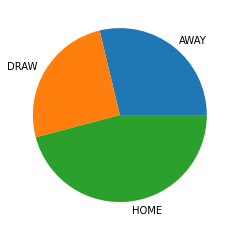

In [740]:
labels = ['AWAY', 'DRAW', 'HOME']
plt.pie(ax3, labels=labels)

In [741]:
# check winning percentage
home_wins = ax3['HOME']
away_wins = ax3['AWAY']
draw = ax3['DRAW']
total_matches = home_wins + away_wins + draw

print(total_matches)
home_winning_percent = (home_wins/total_matches)*100
away_winning_percent = (away_wins/total_matches)*100
draw_percent = (draw/total_matches)*100

print('Home Winning Percentage: ', round(home_winning_percent), '%')
print('Away Winning Percentage: ', round(away_winning_percent), '%')
print('Draw Percentage: ', round(draw_percent), '%')

25979
Home Winning Percentage:  46.0 %
Away Winning Percentage:  29.0 %
Draw Percentage:  25.0 %


In [742]:
percent_diff = ((home_wins-away_wins)/(home_wins+away_wins))*100
print('The home team wins', round(percent_diff), '% more than the away team.')

The home team wins 23.0 % more than the away team.


From this analysis, we can conclude from this dataset that a match is more likely to end up with a winner/loser rather than a draw. The home team is also more likely to be the winner than the away team. From this insight, we can explore the reasons why the home team is more likely to win. Some possible reasons could be a stronger support for the home team or more comfort and familiarity for the home team. This could impact how club management attempts to cultivate the culture and atmosphere of the club to maximise the 'home advantage'. This could also have implications strategically for teams, where the coach could decide how to deploy his players (i.e. field all its star players to secure the home win, or rest some star players at home IF the team is able to play better at home than away even without their star player). From a fan retention standpoint, a team would want to play its stars at home to satisfy its home base fans.


In [743]:
match['stage'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34,  4,  5,  6,  7,  8,  9,
       35, 36, 37, 38])

## In which leagues/countries do the home teams win more?

In [744]:
# ingest Country table

country_query = pd.read_sql_query("SELECT * FROM Country", con)
country = pd.DataFrame(country_query)
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [745]:
# ingest League table

league_query = pd.read_sql_query('SELECT * FROM League', con)
league = pd.DataFrame(league_query)
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [746]:
# add countries to match_goals table

match_goals.insert(len(match_goals.columns), 'country_id', match['country_id'])
match_goals

,home_team_name,away_team_name,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner,winning team,country_id
0,GEN,BAC,9987,9993,1,1,DRAW,Draw,1
1,ZUL,LOK,10000,9994,0,0,DRAW,Draw,1
2,CEB,AND,9984,8635,0,3,AWAY,AND,1
3,GEN,MON,9991,9998,5,0,HOME,GEN,1
4,DEN,STL,7947,9985,1,3,AWAY,STL,1
...,...,...,...,...,...,...,...,...,...
25974,GAL,THU,10190,10191,1,0,HOME,GAL,24558
25975,VAD,LUZ,9824,10199,1,2,AWAY,LUZ,24558
25976,GRA,SIO,9956,10179,2,0,HOME,GRA,24558
25977,LUG,ZUR,7896,10243,0,0,DRAW,Draw,24558


In [747]:
match_goals = match_goals.merge(country, left_on='country_id', right_on='id').drop(['id'], axis=1).rename(columns={'name':'country_name'})
match_goals

,home_team_name,away_team_name,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner,winning team,country_id,country_name
0,GEN,BAC,9987,9993,1,1,DRAW,Draw,1,Belgium
1,ZUL,LOK,10000,9994,0,0,DRAW,Draw,1,Belgium
2,CEB,AND,9984,8635,0,3,AWAY,AND,1,Belgium
3,GEN,MON,9991,9998,5,0,HOME,GEN,1,Belgium
4,DEN,STL,7947,9985,1,3,AWAY,STL,1,Belgium
...,...,...,...,...,...,...,...,...,...,...
25974,GAL,THU,10190,10191,1,0,HOME,GAL,24558,Switzerland
25975,VAD,LUZ,9824,10199,1,2,AWAY,LUZ,24558,Switzerland
25976,GRA,SIO,9956,10179,2,0,HOME,GRA,24558,Switzerland
25977,LUG,ZUR,7896,10243,0,0,DRAW,Draw,24558,Switzerland


In [748]:
home_winners = match_goals[match_goals.winner == 'HOME']
home_winners.groupby('country_name')['country_name'].count()

country_name
Belgium         810
England        1390
France         1359
Germany        1107
Italy          1407
Netherlands    1171
Poland          870
Portugal        908
Scotland        760
Spain          1485
Switzerland     650
Name: country_name, dtype: int64

In [749]:
match_goals.groupby('country_name')['country_name'].count()

country_name
Belgium        1728
England        3040
France         3040
Germany        2448
Italy          3017
Netherlands    2448
Poland         1920
Portugal       2052
Scotland       1824
Spain          3040
Switzerland    1422
Name: country_name, dtype: int64

In [750]:
country_list = country['name'].values.tolist()
home_winners_list = home_winners.groupby('country_name')['country_name'].count().values.tolist()
matches_won_by_country = match_goals.groupby('country_name')['country_name'].count().values.tolist()
percent_home = []
for i,j in zip(home_winners_list, matches_won_by_country):
    percent_home.append(round((i/j)*100))
print(home_winners_list)
print(matches_won_by_country)
print(percent_home)

[810, 1390, 1359, 1107, 1407, 1171, 870, 908, 760, 1485, 650]
[1728, 3040, 3040, 2448, 3017, 2448, 1920, 2052, 1824, 3040, 1422]
[47, 46, 45, 45, 47, 48, 45, 44, 42, 49, 46]


Text(0, 0.5, 'Percentage of home wins')

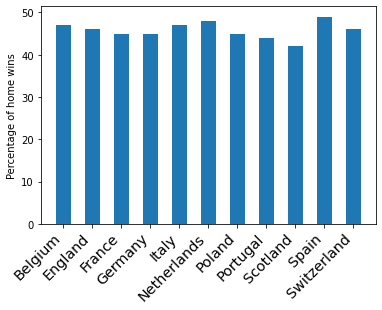

In [751]:
plt.bar(country_list, percent_home, width=0.5)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.ylabel('Percentage of home wins')

From our previous analysis of matches, the home winning percentage is 46%. From this analysis, the percentage of home wins in each country is close to 46% and there are no large differences in any country.


## Does build up play of a team affect its winning rate?

In order to explore this, we examine the correlation between the build up play attributes from the Team_Attributes table in relation to the winning rate of the team to be calculated from the Match table.

In [752]:
# ingest Team_Attributes table
team_att_query = pd.read_sql_query("SELECT * FROM Team_Attributes", con)
team_att = pd.DataFrame(team_att_query)
team_att

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [753]:
team_att.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [754]:
team_att[['buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass']]

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass
0,60,Balanced,NaN,Little,50,Mixed,Organised
1,52,Balanced,48.0,Normal,56,Mixed,Organised
2,47,Balanced,41.0,Normal,54,Mixed,Organised
3,70,Fast,NaN,Little,70,Long,Organised
4,47,Balanced,NaN,Little,52,Mixed,Organised
...,...,...,...,...,...,...,...
1453,52,Balanced,NaN,Little,52,Mixed,Organised
1454,54,Balanced,NaN,Little,51,Mixed,Organised
1455,54,Balanced,NaN,Little,51,Mixed,Organised
1456,54,Balanced,42.0,Normal,51,Mixed,Organised


In [755]:
team_att['buildUpPlaySpeedClass'].unique()

array(['Balanced', 'Fast', 'Slow'], dtype=object)

In [756]:
team_att['buildUpPlayDribblingClass'].unique()

array(['Little', 'Normal', 'Lots'], dtype=object)

In [757]:
team_att['buildUpPlayPassingClass'].unique()

array(['Mixed', 'Long', 'Short'], dtype=object)

In [758]:
team_att['buildUpPlayPositioningClass'].unique()

array(['Organised', 'Free Form'], dtype=object)

In [759]:
# find winning rate of each team
match_goals.groupby('winning team')['winning team'].count()

winning team
AAR     35
ABE    120
ACA     56
ACM    154
AJA    203
      ... 
ZAR     43
ZAW     19
ZUL     78
ZUR    120
ZWO     49
Name: winning team, Length: 260, dtype: int64

In [760]:
# to count wins, first create dictionary to keep count of each team wins
team_list = list(team['team_short_name'])
team_wins = [0]*len(team_list)
team_wins_dict = dict(zip(team_list,team_wins))

# create dictionary to keep count of team matches played
matches_played = [0]*len(team_list)
matches_played_dict = dict(zip(team_list, matches_played))

In [761]:
# count wins
wins_list = list(match_goals['winning team'])
for win in wins_list:
    for key, value in team_wins_dict.items():
        if win == key:
            team_wins_dict[key] += 1
team_wins_dict

{'GEN': 312,
 'BAC': 40,
 'ZUL': 78,
 'LOK': 74,
 'CEB': 58,
 'AND': 136,
 'MON': 230,
 'DEN': 9,
 'STL': 106,
 'MEC': 79,
 'CLB': 123,
 'ROS': 62,
 'KOR': 82,
 'TUB': 7,
 'MOU': 12,
 'WES': 54,
 'CHA': 55,
 'STT': 31,
 'LIE': 22,
 'EUP': 5,
 'O-H': 22,
 'WAA': 24,
 'OOS': 29,
 'MOP': 14,
 'MUN': 192,
 'NEW': 82,
 'ARS': 170,
 'WBA': 75,
 'SUN': 78,
 'LIV': 163,
 'WHU': 80,
 'WIG': 50,
 'AVL': 86,
 'MCI': 175,
 'EVE': 121,
 'BLB': 42,
 'MID': 7,
 'TOT': 151,
 'BOL': 111,
 'STK': 98,
 'HUL': 32,
 'FUL': 71,
 'CHE': 176,
 'POR': 206,
 'BIR': 21,
 'WOL': 142,
 'BUR': 15,
 'BLA': 10,
 'SWA': 62,
 'QPR': 22,
 'NOR': 39,
 'SOU': 60,
 'REA': 234,
 'CRY': 37,
 'CAR': 7,
 'LEI': 51,
 'BOU': 18,
 'WAT': 12,
 'AUX': 53,
 'NAN': 101,
 'BOR': 126,
 'CAE': 56,
 'LEH': 7,
 'NIC': 106,
 'LEM': 18,
 'LOR': 97,
 'LYO': 153,
 'TOU': 103,
 'PSG': 175,
 'LIL': 147,
 'REN': 111,
 'MAR': 228,
 'SOC': 153,
 'GRE': 15,
 'VAL': 244,
 'ETI': 121,
 'LEN': 26,
 'ARL': 3,
 'BRE': 34,
 'AJA': 203,
 'ETG': 45,
 'DIJ'

In [762]:
match['home_team_name'] = match['home_team_api_id']
match['away_team_name'] = match['away_team_api_id']

In [763]:
match['home_team_name'] = match['home_team_name'].map(team_dict)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_name,away_team_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,GEN,9993
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,ZUL,9994
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,CEB,8635
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,GEN,9998
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,DEN,9985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GAL,10191
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAD,10199
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GRA,10179
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LUG,10243


In [764]:
match['away_team_name'] = match['away_team_name'].map(team_dict)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_name,away_team_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,GEN,BAC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,ZUL,LOK
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,CEB,AND
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,GEN,MON
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,DEN,STL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GAL,THU
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAD,LUZ
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GRA,SIO
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LUG,ZUR


In [765]:
# count matches
home_matches = list(match['home_team_name'])
away_matches = list(match['away_team_name'])
total_matches = home_matches + away_matches
for match in total_matches:
    for key, value in matches_played_dict.items():
        if match == key:
            matches_played_dict[key] += 1
matches_played_dict

{'GEN': 732,
 'BAC': 152,
 'ZUL': 212,
 'LOK': 212,
 'CEB': 182,
 'AND': 212,
 'MON': 588,
 'DEN': 34,
 'STL': 212,
 'MEC': 212,
 'CLB': 212,
 'ROS': 214,
 'KOR': 212,
 'TUB': 34,
 'MOU': 34,
 'WES': 182,
 'CHA': 182,
 'STT': 118,
 'LIE': 126,
 'EUP': 30,
 'O-H': 90,
 'WAA': 96,
 'OOS': 66,
 'MOP': 60,
 'MUN': 304,
 'NEW': 266,
 'ARS': 304,
 'WBA': 266,
 'SUN': 304,
 'LIV': 380,
 'WHU': 266,
 'WIG': 190,
 'AVL': 304,
 'MCI': 304,
 'EVE': 304,
 'BLB': 152,
 'MID': 38,
 'TOT': 304,
 'BOL': 415,
 'STK': 304,
 'HUL': 152,
 'FUL': 228,
 'CHE': 304,
 'POR': 354,
 'BIR': 76,
 'WOL': 386,
 'BUR': 76,
 'BLA': 38,
 'SWA': 190,
 'QPR': 114,
 'NOR': 152,
 'SOU': 152,
 'REA': 342,
 'CRY': 114,
 'CAR': 38,
 'LEI': 136,
 'BOU': 76,
 'WAT': 38,
 'AUX': 152,
 'NAN': 342,
 'BOR': 304,
 'CAE': 190,
 'LEH': 38,
 'NIC': 304,
 'LEM': 76,
 'LOR': 304,
 'LYO': 304,
 'TOU': 304,
 'PSG': 304,
 'LIL': 304,
 'REN': 304,
 'MAR': 552,
 'SOC': 456,
 'GRE': 76,
 'VAL': 684,
 'ETI': 304,
 'LEN': 114,
 'ARL': 38,
 'BRE

In [766]:
# create lists of team wins, matches played and calculate the win rate
team_wins_list = list(team_wins_dict.values())
matches_played_list = list(matches_played_dict.values())
win_rate_list = [round((x/y)*100) for x,y in zip(team_wins_list, matches_played_list)]
win_rate_dict = dict(zip(team_list, win_rate_list))
win_rate_dict

{'GEN': 51,
 'BAC': 26,
 'ZUL': 37,
 'LOK': 35,
 'CEB': 32,
 'AND': 64,
 'MON': 30,
 'DEN': 50,
 'STL': 37,
 'MEC': 58,
 'CLB': 29,
 'ROS': 36,
 'KOR': 21,
 'TUB': 35,
 'MOU': 30,
 'WES': 30,
 'CHA': 26,
 'STT': 17,
 'LIE': 17,
 'EUP': 24,
 'O-H': 25,
 'WAA': 44,
 'OOS': 23,
 'MOP': 63,
 'MUN': 31,
 'NEW': 56,
 'ARS': 28,
 'WBA': 26,
 'SUN': 43,
 'LIV': 24,
 'WHU': 26,
 'WIG': 28,
 'AVL': 58,
 'MCI': 40,
 'EVE': 28,
 'BLB': 18,
 'MID': 50,
 'TOT': 27,
 'BOL': 34,
 'STK': 21,
 'HUL': 31,
 'FUL': 58,
 'CHE': 58,
 'POR': 37,
 'BIR': 37,
 'WOL': 24,
 'BUR': 26,
 'BLA': 33,
 'SWA': 19,
 'QPR': 26,
 'NOR': 39,
 'SOU': 68,
 'REA': 29,
 'CRY': 18,
 'CAR': 38,
 'LEI': 29,
 'BOU': 24,
 'WAT': 35,
 'AUX': 30,
 'NAN': 41,
 'BOR': 29,
 'CAE': 18,
 'LEH': 35,
 'NIC': 24,
 'LEM': 32,
 'LOR': 50,
 'LYO': 34,
 'TOU': 58,
 'PSG': 37,
 'LIL': 34,
 'REN': 20,
 'MAR': 60,
 'SOC': 40,
 'GRE': 23,
 'VAL': 18,
 'ETI': 22,
 'LEN': 53,
 'ARL': 29,
 'BRE': 30,
 'AJA': 51,
 'ETG': 36,
 'DIJ': 18,
 'REI': 34,
 'BA

In [767]:
# create df to compare buildup attributes with win rate
buildup = pd.DataFrame(list(win_rate_dict.items()),columns=['team_name','win_rate'])
team_id = team['team_api_id']
buildup.insert(0, 'team_id', team_id)
buildup

,team_id,team_name,win_rate
0,9987,GEN,51
1,9993,BAC,26
2,10000,ZUL,37
3,9994,LOK,35
4,9984,CEB,32
...,...,...,...
226,9764,MAL,29
227,8348,OSA,42
228,7842,VIL,33
229,158085,COR,33


In [768]:
buildup_att = team_att[['team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass']]
buildup_att

,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass
0,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised
1,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised
2,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised
3,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised
4,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised
...,...,...,...,...,...,...,...,...,...
1453,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised
1454,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised
1455,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised
1456,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised


In [769]:
buildup = buildup.merge(buildup_att, left_on='team_id', right_on='team_api_id').drop(['team_api_id'],axis=1)

In [770]:
buildup.dropna()

,team_id,team_name,win_rate,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass
4,9987,GEN,51,2014-09-19 00:00:00,58,Balanced,52.0,Normal,38,Mixed,Organised
5,9987,GEN,51,2015-09-10 00:00:00,58,Balanced,52.0,Normal,38,Mixed,Organised
14,10000,ZUL,37,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised
15,10000,ZUL,37,2015-09-10 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised
20,9994,LOK,35,2014-09-19 00:00:00,62,Balanced,45.0,Normal,52,Mixed,Organised
...,...,...,...,...,...,...,...,...,...,...,...
1128,7842,VIL,33,2014-09-19 00:00:00,66,Balanced,56.0,Normal,52,Mixed,Organised
1129,7842,VIL,33,2015-09-10 00:00:00,59,Balanced,56.0,Normal,52,Mixed,Organised
1130,158085,COR,33,2014-09-19 00:00:00,69,Fast,66.0,Normal,39,Mixed,Organised
1131,158085,COR,33,2015-09-10 00:00:00,65,Balanced,66.0,Normal,39,Mixed,Organised


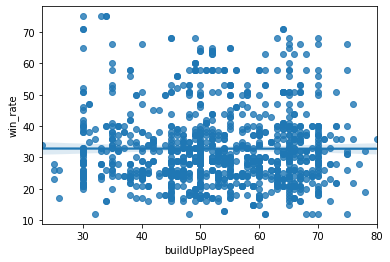

In [773]:
sns.regplot(buildup['buildUpPlaySpeed'], buildup['win_rate'])

In [798]:
buildup[['win_rate', 'buildUpPlaySpeed']].corr()

,win_rate,buildUpPlaySpeed
win_rate,1.000000,-0.001089
buildUpPlaySpeed,-0.001089,1.000000


In [818]:
buildup['win_rate'].describe()

count    1133.000000
mean       32.804060
std        11.964114
min        12.000000
25%        24.000000
50%        30.000000
75%        38.000000
max        75.000000
Name: win_rate, dtype: float64

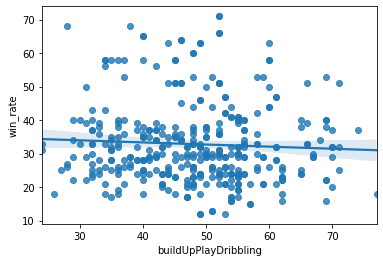

In [804]:
sns.regplot(buildup['buildUpPlayDribbling'], buildup['win_rate'])

In [805]:
buildup[['win_rate', 'buildUpPlayDribbling']].corr()

,win_rate,buildUpPlayDribbling
win_rate,1.000000,-0.055317
buildUpPlayDribbling,-0.055317,1.000000


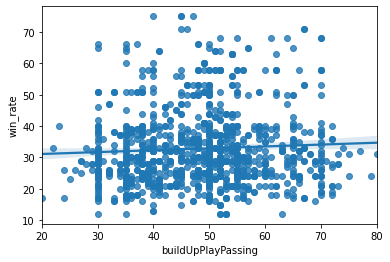

In [802]:
sns.regplot(buildup['buildUpPlayPassing'],buildup['win_rate'])

In [799]:
buildup[['win_rate', 'buildUpPlayPassing']].corr()

,win_rate,buildUpPlayPassing
win_rate,1.000000,0.054542
buildUpPlayPassing,0.054542,1.000000


In [787]:
buildup.sort_values(by=['win_rate'], ascending=False)

,team_id,team_name,win_rate,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass
965,2183,ZAG,75,2011-02-22 00:00:00,33,Slow,NaN,Little,47,Mixed,Organised
964,2183,ZAG,75,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,Organised
966,2183,ZAG,75,2012-02-22 00:00:00,34,Balanced,NaN,Little,45,Mixed,Organised
967,2183,ZAG,75,2013-09-20 00:00:00,34,Balanced,NaN,Little,45,Mixed,Organised
1004,8028,AMA,71,2010-02-22 00:00:00,30,Slow,NaN,Little,45,Mixed,Organised
...,...,...,...,...,...,...,...,...,...,...,...
569,8226,NUR,12,2013-09-20 00:00:00,32,Slow,NaN,Little,53,Mixed,Organised
568,8226,NUR,12,2012-02-22 00:00:00,61,Balanced,NaN,Little,53,Mixed,Organised
491,6391,S04,12,2015-09-10 00:00:00,48,Balanced,53.0,Normal,52,Mixed,Organised
490,6391,S04,12,2013-09-20 00:00:00,61,Balanced,NaN,Little,52,Mixed,Organised


#### Explore if there is a correlation between build up play classes

In [791]:
buildup.groupby('buildUpPlaySpeedClass')['win_rate'].mean()

buildUpPlaySpeedClass
Balanced    32.762637
Fast        32.917808
Slow        33.077922
Name: win_rate, dtype: float64

In [793]:
buildup.groupby('buildUpPlayDribblingClass')['win_rate'].mean()

buildUpPlayDribblingClass
Little    32.783990
Lots      31.714286
Normal    32.923077
Name: win_rate, dtype: float64

In [794]:
buildup.groupby('buildUpPlayPassingClass')['win_rate'].mean()

buildUpPlayPassingClass
Long     32.756757
Mixed    33.084463
Short    30.150000
Name: win_rate, dtype: float64

In [795]:
buildup.groupby('buildUpPlayPositioningClass')['win_rate'].mean()

buildUpPlayPositioningClass
Free Form    36.392157
Organised    32.634935
Name: win_rate, dtype: float64

In [797]:
buildup[['win_rate', 'buildUpPlaySpeed']]

,win_rate,buildUpPlaySpeed
win_rate,1.000000,-0.001089
buildUpPlaySpeed,-0.001089,1.000000


#### There seems to be no strong correlation between build up play and win rate. Thus, teams should focus on the build up play style that is suitable and comfortable for their team.


In [824]:
players[['birthday', 'overall_rating']].corr

<bound method DataFrame.corr of                    birthday  overall_rating
0       1992-02-29 00:00:00            67.0
1       1992-02-29 00:00:00            67.0
2       1992-02-29 00:00:00            62.0
3       1992-02-29 00:00:00            61.0
4       1992-02-29 00:00:00            61.0
...                     ...             ...
183973  1982-06-05 00:00:00            83.0
183974  1982-06-05 00:00:00            78.0
183975  1982-06-05 00:00:00            77.0
183976  1982-06-05 00:00:00            78.0
183977  1982-06-05 00:00:00            80.0

[183978 rows x 2 columns]>

#### Inspect if there is a relationship between the birth month of players and their overall rating, or the number of players born in each month.

Inspired by 'Outliers' by Malcolm Gladwell, where he discussed about how Canadian hockey players born in earlier months have an advantage.

In [827]:
players['birth_month'] = pd.DatetimeIndex(players['birthday']).month

In [828]:
players

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birth_month
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183974,102359,2009-08-30 00:00:00,...,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,6
183974,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183975,102359,2009-02-22 00:00:00,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,6
183975,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183976,102359,2008-08-30 00:00:00,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,6
183976,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183977,102359,2007-08-30 00:00:00,...,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,6


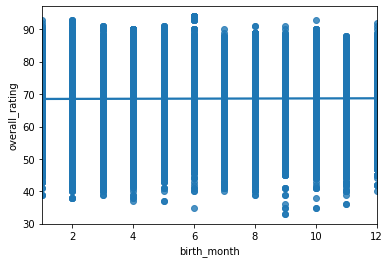

In [882]:
sns.regplot(players['birth_month'], players['overall_rating'])

In [883]:
players[['birth_month', 'overall_rating']].corr()

,birth_month,overall_rating
birth_month,1.000000,0.009012
overall_rating,0.009012,1.000000


In [840]:
players[['height','overall_rating']].corr()

,height,overall_rating
height,1.000000,-0.003475
overall_rating,-0.003475,1.000000


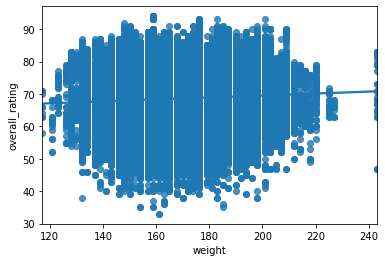

In [838]:
sns.regplot(players['weight'], players['overall_rating'])

In [837]:
players[players['overall_rating'] > 90].sort_values('overall_rating')

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birth_month
6531,388,30723,Alessandro Nesta,1088,1976-03-19 00:00:00,187.96,174,6532,1088,2007-08-30 00:00:00,...,92.0,93.0,95.0,87.0,7.0,21.0,34.0,21.0,21.0,3
170037,10203,30626,Thierry Henry,1625,1977-08-17 00:00:00,187.96,183,170038,1625,2007-02-22 00:00:00,...,91.0,16.0,17.0,14.0,14.0,7.0,67.0,10.0,13.0,8
170036,10203,30626,Thierry Henry,1625,1977-08-17 00:00:00,187.96,183,170037,1625,2007-08-30 00:00:00,...,92.0,21.0,21.0,14.0,14.0,21.0,67.0,21.0,21.0,8
153453,9216,30743,Ronaldinho,28130,1980-03-21 00:00:00,182.88,168,153454,28130,2007-02-22 00:00:00,...,83.0,14.0,28.0,19.0,12.0,10.0,83.0,11.0,10.0,3
153452,9216,30743,Ronaldinho,28130,1980-03-21 00:00:00,182.88,168,153453,28130,2007-08-30 00:00:00,...,83.0,22.0,28.0,19.0,12.0,22.0,85.0,22.0,22.0,3
84874,5120,30627,John Terry,13732,1980-12-07 00:00:00,187.96,198,84856,13732,2007-02-22 00:00:00,...,83.0,93.0,95.0,87.0,7.0,8.0,43.0,8.0,12.0,12
72609,4366,30657,Iker Casillas,5479,1981-05-20 00:00:00,185.42,185,72610,5479,2008-08-30 00:00:00,...,94.0,22.0,22.0,9.0,94.0,88.0,71.0,90.0,96.0,5
180722,10861,39854,Xavi Hernandez,10535,1980-01-25 00:00:00,170.18,148,180723,10535,2012-02-22 00:00:00,...,75.0,55.0,62.0,61.0,5.0,15.0,12.0,5.0,9.0,1
63874,3826,30717,Gianluigi Buffon,1179,1978-01-28 00:00:00,193.04,201,63875,1179,2007-08-30 00:00:00,...,88.0,21.0,21.0,9.0,90.0,91.0,79.0,96.0,90.0,1
53197,3183,34520,Fabio Cannavaro,1183,1973-09-13 00:00:00,175.26,165,53198,1183,2007-02-22 00:00:00,...,94.0,96.0,93.0,NaN,5.0,6.0,62.0,5.0,11.0,9


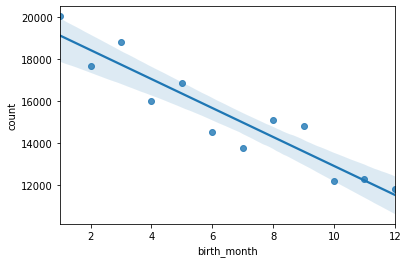

In [958]:
x = players.groupby('birth_month')['birth_month'].count()
df_x = x.to_frame(name='count').reset_index()
sns.regplot(df_x['birth_month'],df_x['count'])

In [959]:
df_x[['birth_month', 'count']].corr()

,birth_month,count
birth_month,1.000000,-0.937183
count,-0.937183,1.000000


From the scatter plot and correlation matrix, there is a strong correlation between the number of professional soccer players and the month they were born with. The earlier birth months have more professional soccer players than the later birth months. From the book 'Outliers' written by Malcolm Gladwell, Gladwell suggested that due to the age group cutoff in the Canadian hockey system, the children born earlier in the year have advantages over children born later in the year. If the European system is similar, this could be a possible explanation for this relationship between birth months and the number of professional soccer players. This could be valuable insight for youth training systems and academies in Europe. Examining and modifying age group systems could perhaps be a strategy to tap into more under-utilised talent that were not well developed simply because they were born at the "wrong time".